In [1]:
import pandas as pd
import numpy as np

# from learning_script import *
# from tufts_campus_locations import *
import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python tufts_campus_locations.py 
```
from the top level directory.

In [2]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

sc.fill_buildings(student_df = student_df, hall_df = hall_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning_script.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [3]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s, region_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a, region_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get building capacity column vector.
building_capacity = sc.get_building_capacity_df().values

# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df, 
                                    gender_quant_s = gender_quant_s, 
                                    race_quant_s = race_quant_s, 
                                    region_quant_s = region_quant_s, 
                                    gender_quant_a = gender_quant_a, 
                                    race_quant_a = race_quant_a, 
                                    region_quant_a = region_quant_a, 
                                    alpha = -1)

In [4]:
# Get art capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df)

# Reduce cost df to remove duplicate columns.
art_capacity = art_capacity_df["capacity"].values.reshape(-1,1)
cost_df = cost_df.loc[:,art_capacity_df["original_index"].values]

P = sc.learn_optimal_assignment(cost_df, 
                             building_capacity, 
                             art_capacity, 
                             lam = 10) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
assignment_df = pd.DataFrame(P, index = cost_df.index,
                  columns = art_capacity_df["tuples"].values)

In [5]:
assignment_df

,"(0, 0, 0)","(0, 0, 1)","(0, 0, 2)","(0, 0, 3)","(0, 0, 4)","(0, 0, 5)","(0, 0, 8)","(0, 1, 1)","(0, 2, 0)","(0, 2, 1)",...,"(4, 2, 6)","(5, 0, 0)","(5, 0, 3)","(5, 1, 1)","(5, 1, 2)","(5, 2, 3)","(5, 2, 4)","(6, 0, 1)","(6, 1, 1)","(6, 2, 1)"
goddard_chapel,4.933848,7.599193,1.327159,19.154585,1.838966,6.485424,0.028731,3.256636,0.061972,5.840998,...,0.309654,0.282497,0.065151,0.404069,3.666898,0.096004,0.060964,4.236342,3.760725,4.796683
lane_hall,0.043793,0.067566,0.011731,0.170395,0.016366,0.057589,0.000195,0.028962,0.000457,0.051935,...,0.002664,0.002441,0.000534,0.003596,0.032521,0.000797,0.000458,0.037665,0.033438,0.042647
dental_school,1.028554,1.589006,0.276087,4.001085,0.385091,1.35239,0.005266,0.685825,0.011276,1.224647,...,0.06367,0.058547,0.014664,0.090916,0.76479,0.021141,0.012175,0.887932,0.791378,1.0072
miner_hall,0.021897,0.033783,0.005866,0.085197,0.008183,0.028794,0.000098,0.014481,0.000229,0.025968,...,0.001332,0.00122,0.000267,0.001798,0.016261,0.000399,0.000229,0.018832,0.016719,0.021324
sophia_gordon_hall,0.021897,0.033769,0.005866,0.085186,0.008183,0.028793,0.0001,0.014475,0.000233,0.025949,...,0.001335,0.001221,0.000262,0.001789,0.016265,0.000394,0.000231,0.018819,0.016709,0.021305
granoff_music_bld,0.109524,0.16883,0.029397,0.425868,0.040978,0.143997,0.000573,0.072371,0.001258,0.129771,...,0.006769,0.006184,0.001385,0.008984,0.081374,0.002059,0.001248,0.094113,0.083561,0.106565
granoff_fam_hillel_center,0.021906,0.033772,0.005883,0.085169,0.008199,0.0288,0.000118,0.014472,0.000253,0.025964,...,0.001356,0.001241,0.000284,0.001799,0.016271,0.000417,0.000252,0.018831,0.016712,0.021324
univ_advancement,0.065707,0.101303,0.017624,0.255539,0.024574,0.086393,0.000328,0.043425,0.000737,0.077863,...,0.004044,0.003694,0.000817,0.005387,0.048822,0.001222,0.000732,0.056465,0.050138,0.063936
jean_mayer_hnra_center,0.524651,0.811577,0.139545,2.045929,0.195284,0.69039,0.000935,0.349091,0.003823,0.624268,...,0.030505,0.027958,0.005491,0.044209,0.38973,0.00867,0.004094,0.452405,0.40272,0.512646
goddard_hall,0.329911,0.504155,0.090097,1.275265,0.124692,0.432978,0.003999,0.214598,0.00682,0.386564,...,0.022995,0.020651,0.005257,0.025081,0.245811,0.007555,0.006238,0.2806,0.248171,0.317213


In [5]:
art_capacity_df = get_art_capacity_with_downsampling(art_df)

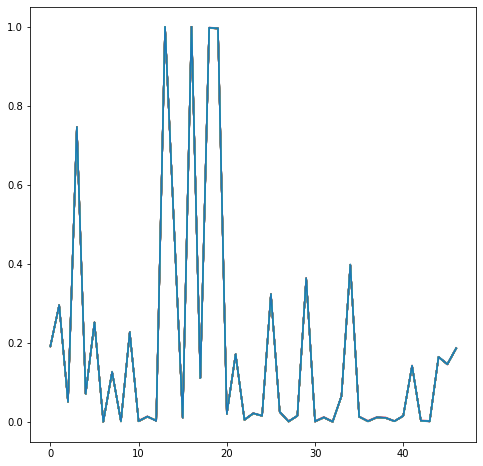

In [13]:
def visualize_downsampling_assignment(assignment_df, art_capacity_df):
    fig, ax = plt.subplots(figsize = (8,8))
    for b in assignment_df.index:
        
        v = assignment_df.loc[b,:].values
        ax.plot(v/v.max())
    plt.show()
    
building_capacity = assignment_df.sum(axis = 1)
visualize_downsampling_assignment(assignment_df, art_capacity_df)

In [20]:
assignment_df.loc["anderson"].sort_values(ascending = False)

(1, 2, 1)    0.422426
(1, 2, 3)    0.211228
(1, 1, 1)    0.087908
(1, 2, 4)    0.051546
(0, 0, 3)    0.035416
(1, 1, 3)    0.023958
(4, 2, 1)    0.018864
(3, 2, 5)    0.017291
(2, 2, 2)    0.015391
(0, 0, 1)    0.014038
(0, 0, 5)    0.012007
(0, 2, 1)    0.010785
(0, 0, 0)    0.009142
(6, 2, 1)    0.008858
(2, 0, 2)    0.008188
(6, 0, 1)    0.007828
(6, 1, 1)    0.006929
(5, 1, 2)    0.006792
(0, 1, 1)    0.005996
(1, 2, 2)    0.005322
(0, 0, 4)    0.003438
(4, 1, 1)    0.003118
(0, 0, 2)    0.002481
(3, 1, 1)    0.001211
(2, 1, 2)    0.001078
(1, 2, 7)    0.001021
(2, 2, 1)    0.000763
(3, 2, 1)    0.000758
(5, 1, 1)    0.000731
(0, 2, 3)    0.000695
(4, 2, 3)    0.000678
(4, 2, 6)    0.000605
(3, 2, 8)    0.000604
(5, 0, 0)    0.000552
(1, 1, 4)    0.000551
(2, 1, 1)    0.000263
(5, 2, 3)    0.000199
(1, 0, 1)    0.000174
(0, 2, 2)    0.000165
(0, 2, 0)     0.00015
(4, 2, 4)    0.000148
(5, 2, 4)    0.000144
(5, 0, 3)    0.000142
(3, 2, 6)    0.000128
(3, 1, 6)     0.00011
(4, 0, 4) 

In [17]:
assignment_df

,"(0, 0, 0)","(0, 0, 1)","(0, 0, 2)","(0, 0, 3)","(0, 0, 4)","(0, 0, 5)","(0, 0, 8)","(0, 1, 1)","(0, 2, 0)","(0, 2, 1)",...,"(4, 2, 6)","(5, 0, 0)","(5, 0, 3)","(5, 1, 1)","(5, 1, 2)","(5, 2, 3)","(5, 2, 4)","(6, 0, 1)","(6, 1, 1)","(6, 2, 1)"
eaton_hall,0.045532,0.070221,0.012203,0.177082,0.016999,0.059871,0.000211,0.030145,0.000497,0.053985,...,0.002793,0.00255,0.000562,0.00378,0.03384,0.000846,0.000499,0.039145,0.0348,0.044338
anderson,0.009142,0.014038,0.002481,0.035416,0.003438,0.012007,0.000086,0.005996,0.00015,0.010785,...,0.000605,0.000552,0.000142,0.000731,0.006792,0.000199,0.000144,0.007828,0.006929,0.008858
lane_hall,0.045542,0.070236,0.012215,0.177091,0.017011,0.059881,0.000223,0.03012,0.000504,0.053996,...,0.002799,0.002561,0.000575,0.003758,0.03383,0.000852,0.000504,0.03916,0.034777,0.044346
aidekman,2.050021,3.160252,0.55039,7.968923,0.766152,2.695208,0.010808,1.355294,0.023757,2.429528,...,0.126954,0.116044,0.026343,0.169134,1.523252,0.03899,0.023668,1.761989,1.564869,1.995378
clic,0.018234,0.02809,0.004905,0.070836,0.006823,0.023968,0.00011,0.012034,0.000227,0.021591,...,0.001142,0.001045,0.000244,0.001493,0.013545,0.000355,0.000224,0.015662,0.013898,0.017733
ballou,0.428151,0.660216,0.114886,1.664647,0.159961,0.562932,0.002163,0.283136,0.004828,0.507581,...,0.026392,0.024149,0.005458,0.035351,0.31807,0.008074,0.004825,0.368119,0.326917,0.416884
goddard_hall,0.009147,0.014016,0.002486,0.035412,0.003443,0.012011,0.000092,0.005982,0.000165,0.010757,...,0.000617,0.000557,0.000139,0.000717,0.006811,0.0002,0.000154,0.007806,0.006915,0.008831
goddard_chapel,0.00911,0.014045,0.002445,0.035417,0.003404,0.011978,0.000047,0.006025,0.000104,0.010798,...,0.000563,0.000514,0.000116,0.000753,0.00677,0.000173,0.000104,0.00783,0.006957,0.008869
miner_hall,0.027325,0.042142,0.007329,0.106255,0.010206,0.035929,0.000134,0.018072,0.000303,0.032397,...,0.001679,0.001537,0.000345,0.002255,0.020298,0.000511,0.000303,0.023496,0.020866,0.026608
tisch_library,0.218691,0.337072,0.058733,0.850011,0.081746,0.287508,0.00118,0.144547,0.002574,0.259127,...,0.013577,0.012404,0.002823,0.018029,0.162507,0.004178,0.002558,0.187929,0.166904,0.212821


In [7]:
assignment_df.loc["eaton_hall",:]

0,0,0    0.045532
0,0,1    0.070221
0,0,2    0.012203
0,0,3    0.177082
0,0,4    0.016999
0,0,5    0.059871
0,0,8    0.000211
0,1,1    0.001532
0,2,0    0.041032
0,2,1    0.001528
0,2,2    0.002945
0,2,3    0.000936
1,0,1    0.039059
1,1,1    0.030017
1,1,3    0.439429
1,1,4     0.11955
1,2,1    0.003791
1,2,2    0.000311
1,2,3    0.005477
1,2,4    0.005109
1,2,7    0.000237
2,0,2     0.01454
2,1,1    0.003836
2,1,2     0.03386
2,2,1    0.034824
2,2,2     0.00049
3,1,1    0.053879
3,1,6    0.000394
3,2,1    0.003803
3,2,5    2.113061
3,2,6    0.026635
3,2,8    1.056706
4,0,4    0.257774
4,1,1    0.006191
4,2,1    0.003805
4,2,3    0.077164
4,2,4    0.002898
4,2,6    0.086248
5,0,0    0.000166
5,0,3    0.002946
5,1,1    0.094388
5,1,2    0.002843
5,2,3    0.000846
5,2,4    0.002883
6,0,1    0.000994
6,1,1    0.001418
6,2,1    0.044338
Name: eaton_hall, dtype: object

In [5]:
# Load category to enumeration mapping dicts
gender_map, race_map, region_map = get_mapping_dicts()

# Load data
hall_df, student_df, art_df = load_data()

In [6]:
# Load quantized data
gender_quant_s, race_quant_s, region_quant_s = get_quantized_student_data(student_df,gender_map, race_map, region_map)
gender_quant_a, race_quant_a, region_quant_a = get_quantized_art_data(art_df,gender_map, race_map, region_map)

In [7]:
# Load building capacity column vector.
building_capacity = get_building_capacity(hall_df)
print(building_capacity.shape)

# Load art capacity with downsampling.
art_capacity = get_art_capacity_with_downsampling(art_df)
print(art_capacity.shape)

(21, 1)
(47, 1)


In [8]:
cost_df = compute_cost_matrix(art_df, 
                              hall_df, 
                gender_quant_s, 
                race_quant_s, 
                region_quant_s, 
                gender_quant_a, 
                race_quant_a, 
                region_quant_a, 
                alpha = -500)
    
cost_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128
eaton_hall,0.351817,0.351817,0.634932,0.351817,0.634932,0.351817,0.634932,0.351817,0.352606,0.837869,...,0.501462,0.837869,0.835807,0.501462,0.67741,0.837869,0.67741,0.501462,0.837869,0.837869
anderson,0.325152,0.325152,0.541396,0.325152,0.541396,0.325152,0.541396,0.325152,0.393382,0.655922,...,0.42196,0.655922,0.656702,0.42196,0.536841,0.655922,0.536841,0.42196,0.655922,0.655922
lane_hall,0.350996,0.350996,0.638758,0.350996,0.638758,0.350996,0.638758,0.350996,0.366929,0.839071,...,0.499785,0.839071,0.837041,0.499785,0.677284,0.839071,0.677284,0.499785,0.839071,0.839071
aidekman,0.371574,0.371574,0.654496,0.371574,0.654496,0.371574,0.654496,0.371574,0.386422,0.847361,...,0.510236,0.847361,0.845298,0.510236,0.685544,0.847361,0.685544,0.510236,0.847361,0.847361
clic,0.372319,0.372319,0.652271,0.372319,0.652271,0.372319,0.652271,0.372319,0.397708,0.837314,...,0.508846,0.837314,0.835753,0.508846,0.678425,0.837314,0.678425,0.508846,0.837314,0.837314


In [9]:
unique_art_df = art_df[["race_enum","gender_enum","region_enum"
                        ]].drop_duplicates(keep = "first").sort_values(by = [
                        "race_enum","gender_enum","region_enum"])

cost_df = cost_df.loc[:,unique_art_df.index]

In [27]:
str(list(unique_art_df.values[0]))

'[0, 0, 0]'

In [28]:
[str(i).strip("[]").replace(" ",",") for i in unique_art_df.values]

['0,0,0',
 '0,0,1',
 '0,0,2',
 '0,0,3',
 '0,0,4',
 '0,0,5',
 '0,0,8',
 '0,1,1',
 '0,2,0',
 '0,2,1',
 '0,2,2',
 '0,2,3',
 '1,0,1',
 '1,1,1',
 '1,1,3',
 '1,1,4',
 '1,2,1',
 '1,2,2',
 '1,2,3',
 '1,2,4',
 '1,2,7',
 '2,0,2',
 '2,1,1',
 '2,1,2',
 '2,2,1',
 '2,2,2',
 '3,1,1',
 '3,1,6',
 '3,2,1',
 '3,2,5',
 '3,2,6',
 '3,2,8',
 '4,0,4',
 '4,1,1',
 '4,2,1',
 '4,2,3',
 '4,2,4',
 '4,2,6',
 '5,0,0',
 '5,0,3',
 '5,1,1',
 '5,1,2',
 '5,2,3',
 '5,2,4',
 '6,0,1',
 '6,1,1',
 '6,2,1']

In [31]:
P = learn_optimal_assignment(cost_df, building_capacity, art_capacity, lam = 1)
pd.DataFrame(P)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.045627,0.070251,0.012333,0.177009,0.017121,0.059949,0.000358,0.001599,0.0411,0.001594,...,0.086273,0.000316,0.003071,0.094357,0.002959,0.000943,0.002996,0.001105,0.00149,0.044361
1,0.009204,0.014054,0.002563,0.035376,0.003516,0.012058,0.000178,0.000314,0.0083,0.000342,...,0.017305,0.00017,0.000696,0.018817,0.000673,0.000262,0.000696,0.000269,0.000299,0.008872
2,0.045628,0.070262,0.012331,0.177024,0.01712,0.059951,0.000355,0.001571,0.041099,0.001599,...,0.086274,0.000311,0.00307,0.094339,0.00294,0.000939,0.00299,0.001108,0.001464,0.044367
3,2.05263,3.161136,0.553946,7.96682,0.769517,2.697311,0.014866,0.069878,1.849422,0.071116,...,3.882638,0.012897,0.137092,4.245366,0.131752,0.041677,0.134027,0.048531,0.065025,1.9961
4,0.018255,0.028098,0.004935,0.070817,0.006851,0.023985,0.000144,0.00061,0.016451,0.00063,...,0.034521,0.000126,0.001226,0.037723,0.001177,0.000378,0.001203,0.000433,0.000568,0.01774
5,0.428774,0.660411,0.115731,1.664152,0.16076,0.563435,0.003127,0.014658,0.386267,0.014949,...,0.810978,0.002719,0.028686,0.886838,0.027489,0.008713,0.027973,0.010252,0.01365,0.417039
6,0.009242,0.014067,0.002619,0.035325,0.003569,0.012086,0.000244,0.00037,0.008317,0.000374,...,0.017302,0.000238,0.000753,0.018818,0.000735,0.000303,0.00074,0.000326,0.000356,0.008881
7,0.009143,0.014055,0.00249,0.035391,0.003447,0.012005,0.000098,0.000328,0.008234,0.00033,...,0.017261,0.00009,0.000636,0.018863,0.000612,0.000207,0.00062,0.000239,0.000307,0.008877
8,0.027377,0.042157,0.007399,0.106215,0.010272,0.03597,0.000213,0.000943,0.024659,0.000959,...,0.051764,0.000187,0.001842,0.056604,0.001764,0.000564,0.001794,0.000665,0.000878,0.02662
9,0.218912,0.337152,0.059035,0.849831,0.082032,0.287686,0.001525,0.007401,0.197263,0.007533,...,0.414156,0.001313,0.014563,0.452835,0.014013,0.004406,0.01426,0.005103,0.006883,0.212887


In [34]:
pd.DataFrame(P, index = cost_df.index, columns = [str(i).strip("[]").replace(" ",","
                            ) for i in unique_art_df.values])

,"0,0,0","0,0,1","0,0,2","0,0,3","0,0,4","0,0,5","0,0,8","0,1,1","0,2,0","0,2,1",...,"4,2,6","5,0,0","5,0,3","5,1,1","5,1,2","5,2,3","5,2,4","6,0,1","6,1,1","6,2,1"
eaton_hall,0.045627,0.070251,0.012333,0.177009,0.017121,0.059949,0.000358,0.001599,0.0411,0.001594,...,0.086273,0.000316,0.003071,0.094357,0.002959,0.000943,0.002996,0.001105,0.00149,0.044361
anderson,0.009204,0.014054,0.002563,0.035376,0.003516,0.012058,0.000178,0.000314,0.0083,0.000342,...,0.017305,0.00017,0.000696,0.018817,0.000673,0.000262,0.000696,0.000269,0.000299,0.008872
lane_hall,0.045628,0.070262,0.012331,0.177024,0.01712,0.059951,0.000355,0.001571,0.041099,0.001599,...,0.086274,0.000311,0.00307,0.094339,0.00294,0.000939,0.00299,0.001108,0.001464,0.044367
aidekman,2.05263,3.161136,0.553946,7.96682,0.769517,2.697311,0.014866,0.069878,1.849422,0.071116,...,3.882638,0.012897,0.137092,4.245366,0.131752,0.041677,0.134027,0.048531,0.065025,1.9961
clic,0.018255,0.028098,0.004935,0.070817,0.006851,0.023985,0.000144,0.00061,0.016451,0.00063,...,0.034521,0.000126,0.001226,0.037723,0.001177,0.000378,0.001203,0.000433,0.000568,0.01774
ballou,0.428774,0.660411,0.115731,1.664152,0.16076,0.563435,0.003127,0.014658,0.386267,0.014949,...,0.810978,0.002719,0.028686,0.886838,0.027489,0.008713,0.027973,0.010252,0.01365,0.417039
goddard_hall,0.009242,0.014067,0.002619,0.035325,0.003569,0.012086,0.000244,0.00037,0.008317,0.000374,...,0.017302,0.000238,0.000753,0.018818,0.000735,0.000303,0.00074,0.000326,0.000356,0.008881
goddard_chapel,0.009143,0.014055,0.00249,0.035391,0.003447,0.012005,0.000098,0.000328,0.008234,0.00033,...,0.017261,0.00009,0.000636,0.018863,0.000612,0.000207,0.00062,0.000239,0.000307,0.008877
miner_hall,0.027377,0.042157,0.007399,0.106215,0.010272,0.03597,0.000213,0.000943,0.024659,0.000959,...,0.051764,0.000187,0.001842,0.056604,0.001764,0.000564,0.001794,0.000665,0.000878,0.02662
tisch_library,0.218912,0.337152,0.059035,0.849831,0.082032,0.287686,0.001525,0.007401,0.197263,0.007533,...,0.414156,0.001313,0.014563,0.452835,0.014013,0.004406,0.01426,0.005103,0.006883,0.212887


In [32]:
cost_df.index

Index(['eaton_hall', 'anderson', 'lane_hall', 'aidekman', 'clic', 'ballou',
       'goddard_hall', 'goddard_chapel', 'miner_hall', 'tisch_library',
       'dental_school', 'smfa', 'univ_advancement', 'granoff_music_bld',
       'jean_mayer_hnra_center', 'fine_arts_house', 'sophia_gordon_hall',
       'packard_hall', 'houston_hall', 'gifford_house',
       'granoff_fam_hillel_center'],
      dtype='object')

In [8]:
C = np.array(cost_df)
dim_cost = np.shape(C)
num_buildings = dim_cost[0]
C

array([[0.8378690366658125, 0.5014618512227852, 0.8169542192993896,
        0.6774100329623981, 0.8064608080794241, 0.8250726451364999,
        0.844391853676665, 0.32884796044654035, 0.7392514995119509,
        0.3284455320618529, 0.7147631596599466, 0.5650819548695883,
        0.5488832969451062, 0.35260604241894034, 0.640656349358203,
        0.7861159550158096, 0.3518165597189939, 0.7928503713439983,
        0.6349324124361228, 0.7814104332536125, 0.822196939193644,
        0.835806987366912, 0.3616455430670312, 0.7464944621656576,
        0.3629525685735799, 0.7414677153743493, 0.3729930750631588,
        0.7788438996846764, 0.37226912175694693, 0.7532552128391921,
        0.7738523046302033, 0.7742055931831852, 0.827013080769416,
        0.3727220777191861, 0.3713121088657825, 0.5939263018031129,
        0.7320323942445258, 0.7727800082656947, 0.862202616049169,
        0.7063841386575318, 0.38303100468387213, 0.7537555396061815,
        0.6002067713805858, 0.7376375486898048, 0.

In [9]:
art_capacity_df = get_art_capacity_with_downsampling(art_df)
art_capacity = art_capacity_df.values
num_arts = art_capacity.shape[0]
print(art_capacity)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# Initialize P
P = np.eye(num_buildings,num_arts)
# Capacity of buildings
#h = 10*np.ones((num_buildings,1))
# Capacity of art
#K = 5
# Step size

dt = 0.001
t = np.arange(1,num_arts+1)
# Gradiet of second term in the objective
#term2a = np.matmul(np.ones((num_buildings,num_buildings)),P)
#term2b = np.matmul(np.ones((num_buildings,1)),K)

ones_vector= np.ones((num_buildings,1))
lam = 1

for _ in range(1000):
    # gradient descent
    
    term2b = np.matmul(ones_vector,np.matmul(np.transpose(ones_vector),P)-np.transpose(art_capacity))
    P = P - dt*C - lam *dt*(term2b) 
    
    #P = P - dt*C - dt*(term2a-term2b)
    
    # projection
    for i in range(num_buildings):
        v = P[i,:]
        if np.all(v>0):
            v = v/np.sum(v)
            P[i]=v * h[i]
        else:
            mu = v[np.argsort(-v)]
            tmp = np.divide(np.cumsum(mu)-h[i],t)
            idx_negative = np.argwhere(mu-tmp<=0)
            try:
                idx_neg = idx_negative[0]
                idx_neg = idx_neg.item()
            except:
                idx_neg = -1
            theta = (np.sum(mu[0:idx_neg])-h[i])/(idx_neg)
            P[i,:] =  np.maximum(P[i,:]-theta,0)

print(P.sum(axis = 0))

print(P.sum(axis = 1) - h.reshape(1,-1)[0])

## Create Heatmap for permutation matrix

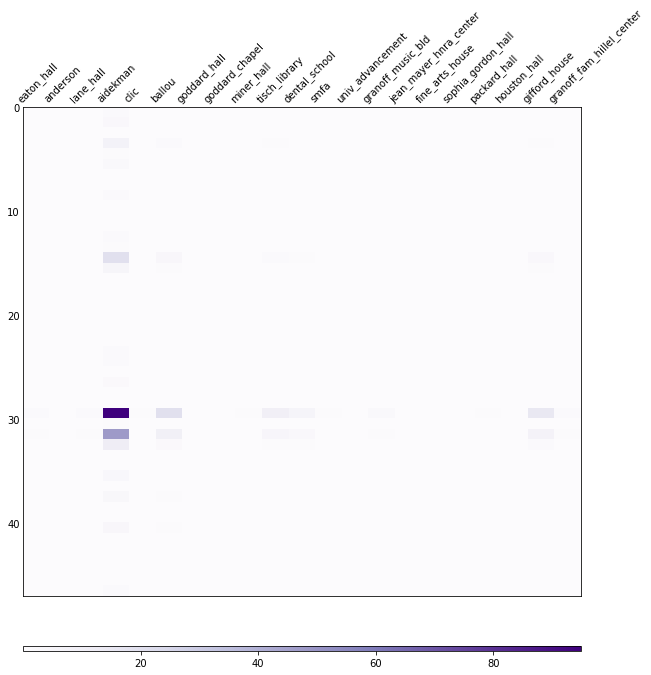

In [172]:
fig, ax = plt.subplots(figsize = (10,10))

#P = (P / P.max(axis = 1).reshape(P.shape[0],-1))

# Create masked array to make 0 values transparent
data = np.array(P).transpose()
data = np.array(data, dtype = float)
data = ma.masked_invalid(np.where(data ==0, np.nan, data))

heatmap = ax.pcolor(data, cmap="Purples", 
                    vmin=np.nanmin(data), vmax=np.nanmax(data))

# add reference colorbar
divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="1%", pad=0.7, pack_start=True)
fig.add_axes(cax)
fig.colorbar(heatmap, cax=cax, orientation="horizontal")


# want a more natural, table-like display
ax.invert_yaxis()

# move x labels to the top of the chart 
ax.xaxis.tick_top()

ax.set_xticks(np.arange(num_buildings))
ax.set_xticklabels(cost_df.index)

# rotate x labels 45 degrees
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="left",
         rotation_mode="anchor")

# remove tick markings
ax.tick_params(length=0)

plt.show() 

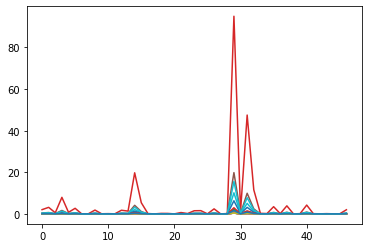

In [175]:
for i in range(P.shape[0]):
    plt.plot(P[i])

In [24]:
P.shape

(21, 47)

In [ ]:
df = pd.DataFrame()

schools = [
        "Arts & Sciences - Liberal Arts",
        "Arts & Sciences - Grad",
        "Arts & Sciences - SMFA",
        "School of Engineering - Undergrdad",
        "School of Engineering - Grad",
        "Cummings School of Veterinary Medicine",
        "Fletcher",
        "Friedman SNSP",
        "Graduate School of Biomedical Sciences",
        "School of Dental Medicine",
        "School of Medicine - MD Students",
        "School of Medicine - PHPD Students",
        "University College",
        "College of Special Studies"
          ]

races = ['American Indian or Alaska Nat.', 
 'Asian',
 'Black or African American', 
 'Hispanics of any race', 
 'White',
 'Nat. Hawaiian or Oth Pac. Island',
 'Two or more races', 
 'International', 
 'Race/Ethnicity unknown']

In [ ]:
import pdfplumber

footer = ['An enrolled student is active/not-withdrawn at Tufts as of October 15th of the selected fall term and enrolled in at least one course for credit.',
         'Students studying abroad in a non-Tufts program are not included in this report.']

header = ["Total","Full-Time Part-Time","Headcount","Enrollment WS"]
lines = []
with pdfplumber.open(r'enrollment.pdf') as pdf:
    for page in pdf.pages:
        lines  += [t for t in page.extract_text().split("\n") if not t in footer + header]
        
df_pdf = pd.DataFrame(columns = ["text","num"])
for i in range(len(lines)):
    line = lines[i]
    line_num = [int(t.replace(",","")) for t in line.split(" ") if t.replace(",","").isdigit()]
    line_text = " ".join([t for t in line.split(" ") if not t.replace(",","").isdigit()])
    if len(line_num) >= 3:
        line_num = line_num[-1]
    else:
        line_num = np.nan
    df_pdf.loc[i,"text"] = line_text
    df_pdf.loc[i,"num"] = line_num
    
df_pdf

In [ ]:
df = pd.DataFrame(index = df_pdf.index)
df["school"] = np.nan
df["gender"] = np.nan
df["race"] = np.nan
df["count"] = df_pdf["num"].copy()

for i in df_pdf.index:
    text = df_pdf.loc[i,"text"]
    if "Female" in text:
        df.loc[i,"gender"] = "woman"
    if "Male" in text:
        df.loc[i,"gender"] = "man"
    
    if "College" in text or "School" in text:
        school = text.replace("Fall ","").split(" Female")[0].split(" Male")[0]
        df.loc[i,"school"] = school
    
df

In [ ]:
df = pd.DataFrame(index = np.arange(len(lines)))
df["school"] = np.nan
df["gender"] = np.nan
df["race"] = np.nan
df["count"] = np.nan


for i in range(len(lines)):
    l = lines[i]
    if "Fall 2020" in l:
        l = l.split("Fall 2020")[1]
    split_line = l.split(" ")
    counts = [int(l.replace(",","")) for l in split_line if l.replace(",","").isdigit()]
    text = " ".join([l.replace(",","") for l in split_line if not l.replace(",","").isdigit()])
    
    df.loc[i,'race'] = text

    
    if "Male" in text:
        df.loc[i,"gender"] = "man"
        df.loc[i,"school"] = text.split("Male")[0]
        df.loc[i,"race"] = text.split("Male")[1].strip(" ")
        
    elif "Female" in text:
        df.loc[i,"gender"] = "woman"
        df.loc[i,"school"] = text.split("Female")[0]
        df.loc[i,"race"] = text.split("Female")[1].strip(" ")
        
    else:
        df.loc[i,'race'] = text.strip(" ")
        
    if len(counts) >=3:
        df.loc[i,"count"] = counts[-1]
        
        if df.loc[i-1,"race"] == "Black or African":
            df.loc[i,"race"] = "Black or African American"
            
        if df.loc[i-1,"race"] == "American Indian or":
            df.loc[i,"race"] = "American Indian or Alaska Nat."
            
            
df = df.loc[5:,]
df = df[~df["count"].isna()]

df.reset_index(drop = True, inplace = True)

In [ ]:
df["race"].unique()

In [ ]:
races = ['American Indian or Alaska Nat.', 
 'Asian',
 'Black or African American', 
 'Hispanics of any race', 
 'White',
 'Nat. Hawaiian or Oth Pac. Island',
 'Two or more races', 
 'International', 
 'Race/Ethnicity unknown']

In [ ]:
races 